## Introduction au fichier

Décrire ici le travail en cours et la base de données.

Antonin Chenard et Pablo Aubert-Lacombe

In [ ]:
# %pip install -r requirements.txt

In [106]:
# penser à créer un fichier requirments pour que le programme soit executable par n'importe quel ordinateur.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.lines import Line2D

In [66]:
# On importe la base de données
base = pd.read_csv("Data_IRFCL_ARA.csv",delimiter=",")

# On transforme le format de la variable numérique "year" en variable temporelle*
base['year'] = pd.to_datetime(base['year'], format="%Y")

# On met le nom de tous les pays en majuscule
base['country'] = base['country'].str.upper()

base.columns

Index(['country', 'iso', 'year', 'deposits', 'securities', 'country_id',
       'region', 'reserves_ara', '_merge', 'share_securities',
       'share_deposits', 'western_asia', 'eastern_asia', 'central_asia',
       'southeastern_asia', 'asia', 'eastern_europe', 'northern_europe',
       'southern_europe', 'western_europe', 'europe', 'northern_africa',
       'eastern_africa', 'middle_africa', 'southern_africa', 'western_africa',
       'africa', 'carribean', 'central_america', 'south_america',
       'northern_america', 'america', 'oceania'],
      dtype='object')

In [ ]:
base.describe()

_merge
Matched (3)        1430
Using only (2)     1230
Master only (1)    1040
Name: count, dtype: int64

# Visualisation des dynamiques nationales

En introduction à la visualisation des données, nous proposons de créer une carte du monde permettant d'observer le taux de réserves de change détenues sous forme de titres financiers, ventilé par pays.

In [105]:
world = gpd.read_file("data/ne_110m_admin_0_countries.zip")
world

AttributeError: module 'fiona' has no attribute 'path'

# Visualisation de la comparaison entre le taux de titres détenus en réserves de change et l'index du FMI

In [99]:
# On organise la base pour opérer des comparaisons graphiques
# On s'assure que le pays étudié sur la période T dispose des deux variables que nous voulons comparer
base_matched = base.dropna(subset=["share_securities","reserves_ara"])

# On supprime le PARAGUAY qui n'a qu'un seul point de données sur toute la période
base_without_paraguay = base_matched.drop(base_matched[base_matched.country == "PARAGUAY"].index)

# On transforme en format tidy
base_tidy = base_without_paraguay.melt(id_vars=["year","country"],var_name="variable", value_name="value")

# On nettoie la base
base_tidy = base_tidy.dropna(how='any',axis=0)
base_tidy["variable"] = base_tidy["variable"].astype("category")

In [100]:
# Je garde uniquement les valeurs qui nous intéressent
base_reduced = base_tidy[base_tidy["variable"].isin(["share_securities", "reserves_ara"])]

Nous proposons ici une première visualisation graphique des données que nous comparons. L'objectif est de mettre en perspective l’évolution des réserves de change détenues sous forme de titres financiers par les banques centrales, en les confrontant à l’index développé par le FMI, conçu pour évaluer le montant théorique que ces banques centrales devraient détenir.

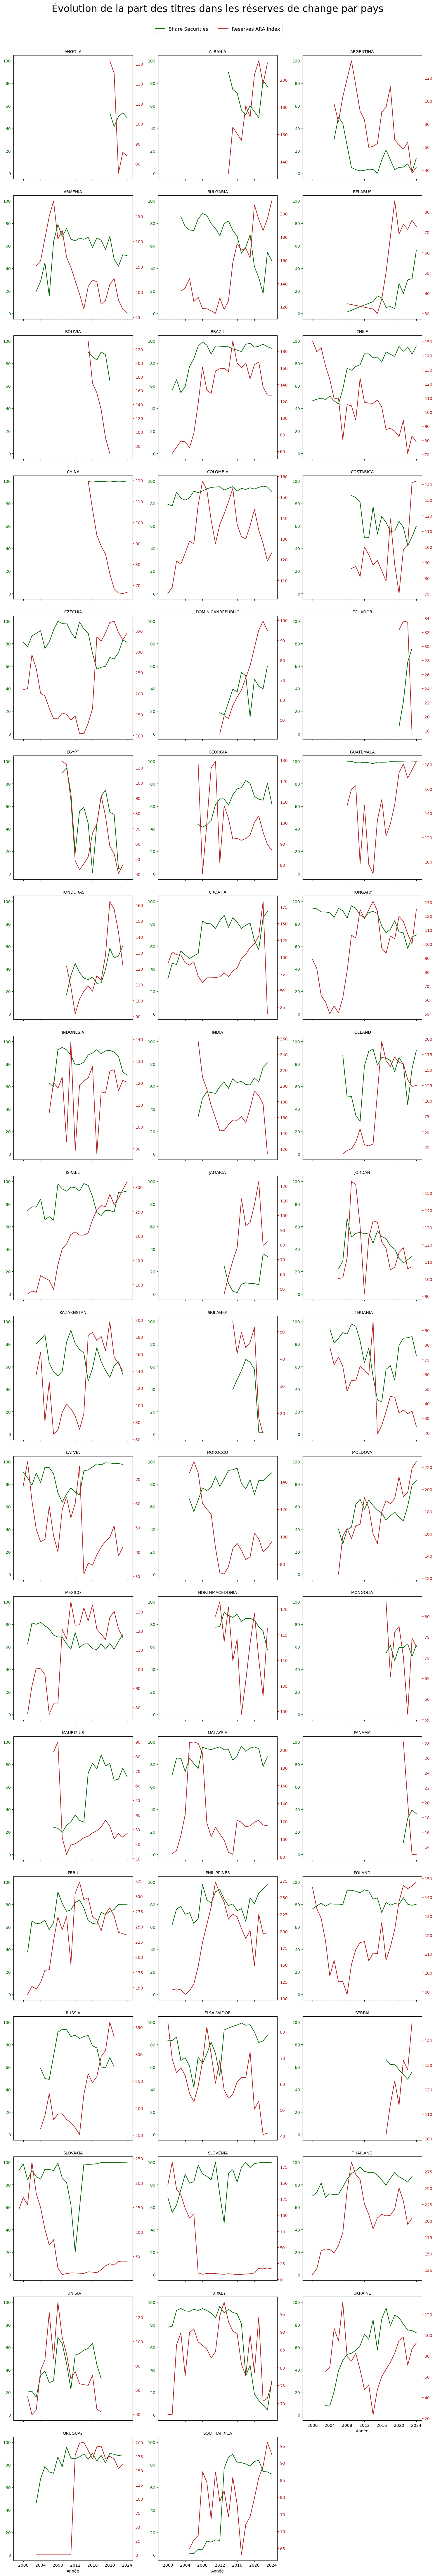

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Pour la légende manuelle

# Création du FacetGrid
g = sns.FacetGrid(base_reduced, col="country", col_wrap=3, height=5) 

# Fonction pour tracer les deux variables avec deux axes Y différents
def dual_axis_plot(data, color):
    ax = plt.gca() 
    ax2 = ax.twinx() 
    
    # On trace la première variable sur l'axe principal
    sns.lineplot(data=data[data["variable"] == "share_securities"], x="year", y="value", ax=ax, color="darkgreen")
    ax.set_ylabel("", color="darkgreen")
    ax.tick_params(axis="y", colors="darkgreen")

    # On trace la seconde variable sur l'axe secondaire
    sns.lineplot(data=data[data["variable"] == "reserves_ara"], x="year", y="value", ax=ax2, color="firebrick")
    ax2.set_ylabel("", color="firebrick")
    ax2.tick_params(axis="y", colors="firebrick")

# On applique la fonction à chaque sous-graphique
g.map_dataframe(dual_axis_plot)

# On ajoute une légende manuelle au FacetGrid
legend_elements = [
    Line2D([0], [0], color="darkgreen", lw=2, label="Securities Share"),
    Line2D([0], [0], color="firebrick", lw=2, label="Reserves ARA Index")
]

g.fig.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, 0.9725), ncol=2, fontsize=12)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Année", "")
plt.subplots_adjust(top=0.960)
g.fig.suptitle("Évolution de la part des titres dans les réserves de change par pays", fontsize=24)

plt.show()